In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from openpyxl.drawing.image import Image
import os

In [4]:
# Load the Data
data = {
    "StudentID": [101, 102, 103, 104, 105, 106, 107],
    "Name": ["Alice", "Bob", "Charlie", "David", "Emma", "Frank", "Grace"],
    "Math": [95, 72, 88, 55, 80, 99, 68],
    "Physics": [89, 65, 91, 62, 77, 95, 72],
    "Chemistry": [92, 70, 85, 58, 79, 97, 74],
    "Biology": [88, 60, 90, 61, 83, 96, 70]
}
df = pd.DataFrame(data)
df.to_excel("students.xlsx", index=False)
df = pd.read_excel("students.xlsx")

In [5]:
# Vectorized Computations
df['Total'] = df[['Math', 'Physics', 'Chemistry', 'Biology']].sum(axis=1)
df['Average'] = df[['Math', 'Physics', 'Chemistry', 'Biology']].mean(axis=1)
conditions = [
    (df['Average'] >= 90),
    (df['Average'] >= 75) & (df['Average'] < 90),
    (df['Average'] >= 60) & (df['Average'] < 75),
    (df['Average'] < 60)
]
choices = ['A', 'B', 'C', 'F']
df['Grade'] = np.select(conditions, choices, default='F')

In [6]:
# Find Top Performers (formatted)
subjects = ['Math', 'Physics', 'Chemistry', 'Biology']
top_performers_list = []

for subject in subjects:
    top_students = df[['StudentID', 'Name', subject]].nlargest(3, subject)
    # First row with subject name
    top_performers_list.append({
        "Subject": subject,
        "StudentID": top_students.iloc[0]["StudentID"],
        "Name": top_students.iloc[0]["Name"],
        "Marks": top_students.iloc[0][subject]
    })
    # Next rows without repeating subject
    for i in range(1, len(top_students)):
        top_performers_list.append({
            "Subject": "",
            "StudentID": top_students.iloc[i]["StudentID"],
            "Name": top_students.iloc[i]["Name"],
            "Marks": top_students.iloc[i][subject]
        })

top_performers_df = pd.DataFrame(top_performers_list)

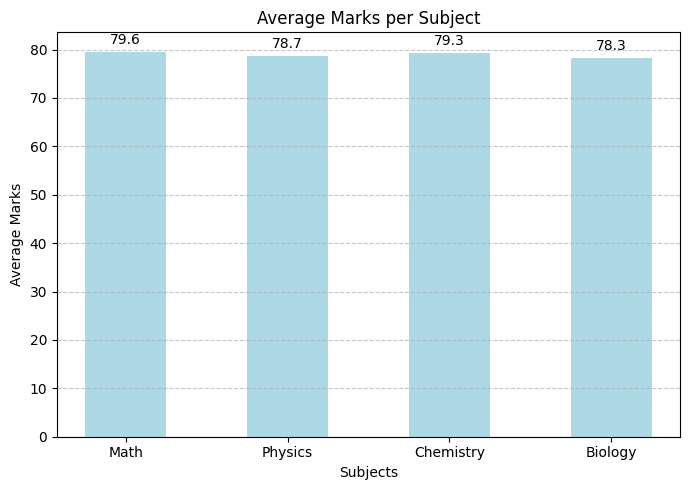

In [7]:
# Data Visualization
avg_marks = df[subjects].mean()
plt.figure(figsize=(7, 5))
bars = plt.bar(avg_marks.index, avg_marks.values, color='lightblue', width=0.5)
plt.title('Average Marks per Subject')
plt.xlabel('Subjects')
plt.ylabel('Average Marks')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1,
             f'{height:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('bar_chart.png')


In [8]:
# Save Results to Excel and Insert Image
summary_df = df[['StudentID', 'Name', 'Total', 'Average', 'Grade']]

with pd.ExcelWriter('results.xlsx', engine='openpyxl') as writer:
    # Write summary and top performers
    summary_df.to_excel(writer, sheet_name='Summary', index=False)
    top_performers_df.to_excel(writer, sheet_name='Top Performers', index=False)

    # Create a new sheet for the chart image
    workbook = writer.book
    chart_sheet = workbook.create_sheet(title='Chart')
    img = Image('bar_chart.png')
    chart_sheet.add_image(img, "A1")

# Delete temporary chart image file
if os.path.exists('bar_chart.png'):
    os.remove('bar_chart.png')

print("Results saved to 'results.xlsx' with Summary, Top Performers, and Chart sheet.")

Results saved to 'results.xlsx' with Summary, Top Performers, and Chart sheet.


In [9]:
# Read back the generated Excel file
from openpyxl import load_workbook
from openpyxl.utils.dataframe import dataframe_to_rows

# Load existing workbook (results.xlsx)
wb = load_workbook('results.xlsx')

# Create 'students' sheet with original marks if not present
if 'students' not in wb.sheetnames:
    ws_students = wb.create_sheet('students', 0)  # insert at first position
    for r in dataframe_to_rows(df, index=False, header=True):
        ws_students.append(r)

# Rename 'Summary' sheet to 'results'
if 'Summary' in wb.sheetnames:
    ws_summary = wb['Summary']
    ws_summary.title = 'results'

# Save updated workbook
wb.save('workbook.xlsx')

print("'workbook.xlsx' with both 'students' and 'results' sheets as required.")

'workbook.xlsx' with both 'students' and 'results' sheets as required.
